In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [23]:
print(X.shape, Y.shape)

(200, 2) (200, 1)


In [24]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}, {np.min(X[:,0]):0.2f}")
print(f"Duration    Max, Min pre normalization: {np.max(X[:,1]):0.2f}, {np.min(X[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99, 151.32
Duration    Max, Min pre normalization: 15.45, 11.51


In [25]:
# Step 1: Create a normalization layer that will standardize each feature (column) independently.
# 'axis=-1' tells it to normalize across the last axis, i.e., each column in a (samples x features) dataset.
norm_l = tf.keras.layers.Normalization(axis=-1)

# Step 2: "Adapt" the layer on your dataset — this calculates and stores the mean and variance for each feature.
# It essentially "learns" the data distribution from X (usually training data).
norm_l.adapt(X)

# Step 3: Apply the normalization layer to X — this transforms the data to have mean=0 and std=1 for each feature.
# You now get the normalized data Xn which can be fed to your model.
Xn = norm_l(X)
# 🔹 np.tile(A, reps)
# Repeats array A along specified axes.
# reps = (m, n) → 
#   - Repeats the array m times along axis 0 (rows)
#   - Repeats the array n times along axis 1 (columns)


In [26]:
# 🔹 np.tile(A, reps)
# Repeats array A along specified axes.
# reps = (m, n) → 
#   - Repeats the array m times along axis 0 (rows)
#   - Repeats the array n times along axis 1 (columns)

Xt = np.tile(Xn, (1000, 1))
Yt = np.tile(Y, (1000, 1))
print(Xt.shape, Yt.shape)

(200000, 2) (200000, 1)


In [27]:
tf.random.set_seed(1234)
model = Sequential([
    tf.keras.Input(shape=(2, )),
    Dense(3, activation='sigmoid', name='layer1'),
    Dense(1, activation='sigmoid', name='layer2'),
])

In [28]:
# The model.summary() provides a description of the network:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ layer1 (Dense)                       │ (None, 3)                   │               9 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ layer2 (Dense)                       │ (None, 1)                   │               4 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

Let's examine the weights and biases Tensorflow has instantiated.  The weights $W$ should be of size (number of features in input, number of units in the layer) while the bias $b$ size should match the number of units in the layer:
- In the first layer with 3 units, we expect W to have a size of (2,3) and $b$ should have 3 elements.
- In the second layer with 1 unit, we expect W to have a size of (3,1) and $b$ should have 1 element.

In [29]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print(f"W1{W1.shape}:\n", W1, f"\nb1{b1.shape}:", b1)
print(f"W2{W2.shape}:\n", W2, f"\nb2{b2.shape}:", b2)

W1(2, 3):
 [[ 0.01  1.03 -0.8 ]
 [-0.49  0.89  0.22]] 
b1(3,): [0. 0. 0.]
W2(3, 1):
 [[ 0.68]
 [-0.07]
 [-0.8 ]] 
b2(1,): [0.]


In [30]:
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

model.fit(
    Xt, Yt,
    epochs=10,
)

Epoch 1/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.2644
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.1342
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - loss: 0.1222
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.1073
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0260
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0145
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0098
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0070
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0050
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - loss: 0.0036


In [31]:
W1, b1 = model.get_layer("layer1").get_weights()
W2, b2 = model.get_layer("layer2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[-1.73e+01  6.59e-03 -1.04e+01]
 [-1.46e+01 -8.52e+00 -1.76e-01]] 
b1: [ -2.56 -10.66 -11.42]
W2:
 [[ 32.12]
 [-40.62]
 [-44.9 ]] 
b2: [-8.9]


In [32]:
X_test = np.array([
    [200, 13.9],
    [200, 17]
])
X_testn = norm_l(X_test)
pred = model.predict(X_testn)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
[[9.55e-01]
 [1.31e-04]]


In [33]:
yhat = (pred >- 0.5).astype(int)
print(yhat)

[[1]
 [1]]


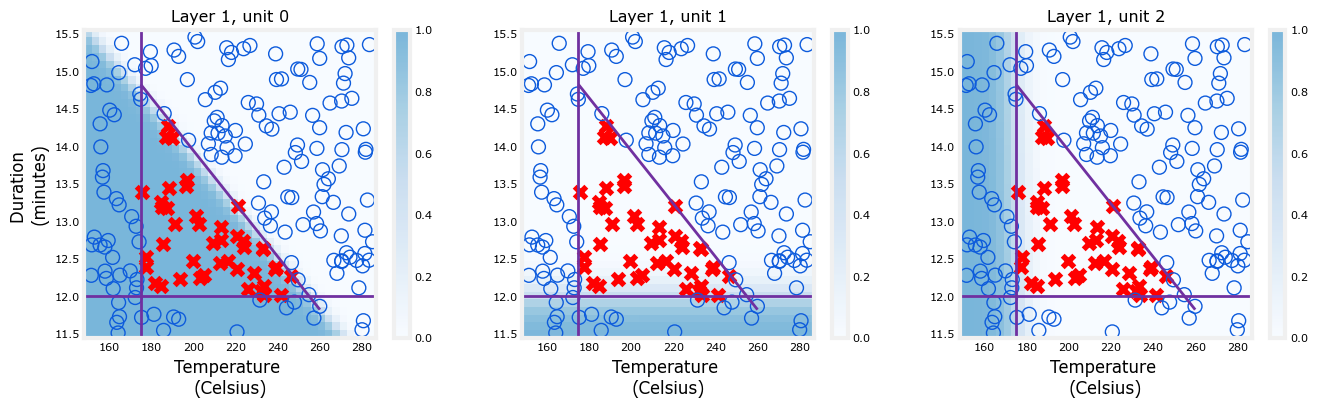

In [34]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

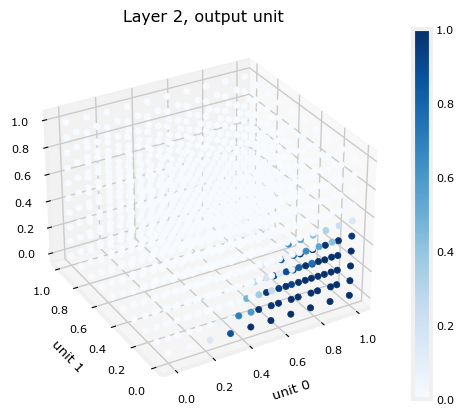

In [35]:
plt_output_unit(W2,b2)